## Yapılacaklar

Bu projede “Cats and Dogs” veri setini kullanarak Transfer Learning ile derin öğrenme modeli eğiteceğiz. Sizden iki farklı notebook dosyası beklenmektedir. Birinci dosyada, verinin önişleme kısmı yapılacak. İkinci dosyada, önceden eğitilmiş bir model, hazırlanan veriler ile tekrar eğitilerek yapay zekâ modeli oluşturulacak. Amacımız herhangi bir accuracy veya loss sonucuna ulaşmak değil; kullanılan yöntemleri öğrenmektir.

Bu çalışma için Google Colab platformunu ve TensorFlow kütüphanesini kullanabilirsiniz.

Google Colab: [https://colab.research.google.com](https://colab.research.google.com)

TensorFlow Doküman: [https://www.tensorflow.org/api_docs/python/tf](https://www.tensorflow.org/api_docs/python/tf)

## 1. Önişleme
  - “Cats and Dogs” veri setini bilgisayarınıza indirin. (786.7MB) [https://www.microsoft.com/en-us/download/details.aspx?id=54765](https://www.microsoft.com/en-us/download/details.aspx?id=54765)
  - Görüntüleri Colab ortamına yükleyin.
  - Görüntüleri sırasıyla okuyarak, hepsini aynı boyuta getirin (resizing), normalizasyon yapın ve her bir görüntüyü etiketiyle birlikte, [görüntü, etiket] formatında bir listeye ekleyin.
  - Oluşturduğunuz listeyi; X_train, y_train, X_val, y_val, X_test ve y_test listelerine bölün.
  - Bu listeleri bilgisayarınıza kaydedin.

## 2. Model Eğitimi
  - Başka bir Colab dosyasında, bilgisayara kaydettiğiniz dosyaları tekrar yükleyin.
  - TensorFlow dokümantasyonunu kullanarak Keras içerisinden bir model seçin ve bu modeli yükleyin.
  - Modeli hazırlamış olduğunuz veriyle eğitin.
  - Model performans metriklerini, loss ve accuracy grafiklerini ekrana yazdırın.

---


In [1]:

#kütüphanelerin yüklenmesi
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')


In [2]:
cats_names = os.listdir("PetImages/Cat/")
dogs_names = os.listdir("PetImages/Dog/")

In [ ]:
cats_names = os.listdir("PetImages/Cat/")
dogs_names = os.listdir("PetImages/Dog/")

for f_name in cats_names:
  try:
    path = "PetImages/Cat/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "new_resized/cats." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    continue

for f_name in dogs_names:
  try:
    path = "PetImages/Dog/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "new_resized/dogs." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    continue

In [3]:
# creaing a for loop to assign labels
filenames = os.listdir("new_resized/")

labels = []
input_path = []

for i in range(len(filenames)):
  input_path.append("new_resized/" + filenames[i])
  file_name = filenames[i]
  label = file_name[0:4]

  if label == 'dogs':
    labels.append(0)
  else:
    labels.append(1)


In [4]:
# Unique values
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[12499 12499]


In [5]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = labels
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,new_resized/cats.2923.jpg,1
1,new_resized/dogs.2562.jpg,0
2,new_resized/cats.6991.jpg,1
3,new_resized/dogs.11634.jpg,0
4,new_resized/dogs.12324.jpg,0


In [6]:
from keras.preprocessing.image import load_img

# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

ImportError: cannot import name 'load_img' from 'keras.preprocessing.image' (c:\ProgramData\Anaconda3\lib\site-packages\keras\preprocessing\image.py)

<AxesSubplot:xlabel='label', ylabel='count'>

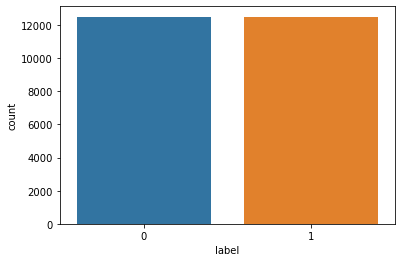

In [7]:
sns.countplot(df['label'])

In [8]:
df['label'] = df['label'].astype('str')
df.head(10)

,images,label
0,new_resized/cats.2923.jpg,1
1,new_resized/dogs.2562.jpg,0
2,new_resized/cats.6991.jpg,1
3,new_resized/dogs.11634.jpg,0
4,new_resized/dogs.12324.jpg,0
5,new_resized/dogs.10653.jpg,0
6,new_resized/cats.5462.jpg,1
7,new_resized/cats.12081.jpg,1
8,new_resized/cats.1166.jpg,1
9,new_resized/dogs.24.jpg,0


In [8]:
# input split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["images"], df["label"], test_size=0.2, random_state=42)

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)


Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [11]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
            Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
            MaxPool2D((2,2)),
            Conv2D(32, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Conv2D(64, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Flatten(),
            Dense(512, activation='relu'),
            Dense(1, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [13]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10


UnknownError: Graph execution error:

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000024C4423E360>
Traceback (most recent call last):

  File "c:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 270, in __call__
    ret = func(*args)

  File "c:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "c:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1030, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 831, in wrapped_generator
    for data in generator_fn():

  File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 957, in generator_fn
    yield x[i]

  File "c:\ProgramData\Anaconda3\lib\site-packages\keras\preprocessing\image.py", line 110, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "c:\ProgramData\Anaconda3\lib\site-packages\keras\preprocessing\image.py", line 337, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "c:\ProgramData\Anaconda3\lib\site-packages\keras\utils\image_utils.py", line 394, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "c:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py", line 2967, in open
    raise UnidentifiedImageError(

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000024C4423E360>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_969]

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

NameError: name 'history' is not defined